# Imports

In [39]:
import pandas as pd
import seaborn as sns

# Create DataFrame

In [40]:
%load_ext amazon_sagemaker_sql_magic

The amazon_sagemaker_sql_magic extension is already loaded. To reload it, use:
  %reload_ext amazon_sagemaker_sql_magic


In [41]:
%%sm_sql --connection-properties '{"connection_type":"ATHENA","work_group":"primary"}' --output '{"format": "DATAFRAME", "dataframe_name": "training_df"}'


-- Query to list columns in table 'AwsDataCatalog.taxi.taxi'
SELECT
  TRIP_MILES, TRIP_SECONDS, FARE, COMPANY, PAYMENT_TYPE, TIP_RATE
FROM
  "AwsDataCatalog"."taxi"."taxi"

Saved results to training_df


In [42]:
print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 1000




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


# View Dataset Statistics

In [43]:
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 1000




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,1000.000000,1000.00000,1000.000000,1000,1000,1000.000000
unique,NaN,NaN,NaN,18,6,NaN
top,NaN,NaN,NaN,Flash Cab,Cash,NaN
freq,NaN,NaN,NaN,231,471,NaN
mean,1.665000,1073.31100,10.862250,NaN,NaN,12.038900
std,1.477605,962.79623,7.678247,NaN,NaN,18.166686
min,0.500000,278.00000,4.750000,NaN,NaN,0.000000
25%,0.790000,480.00000,6.500000,NaN,NaN,0.000000
50%,1.140000,723.50000,8.500000,NaN,NaN,0.000000
75%,1.800000,1201.75000,11.250000,NaN,NaN,23.000000


# View Correlation Matrix

In [44]:
training_df.corr(numeric_only = True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.975220,0.871183,-0.172824
TRIP_SECONDS,0.975220,1.000000,0.888562,-0.181727
FARE,0.871183,0.888562,1.000000,-0.182643
TIP_RATE,-0.172824,-0.181727,-0.182643,1.000000


# Visualize Relationships in Dataset

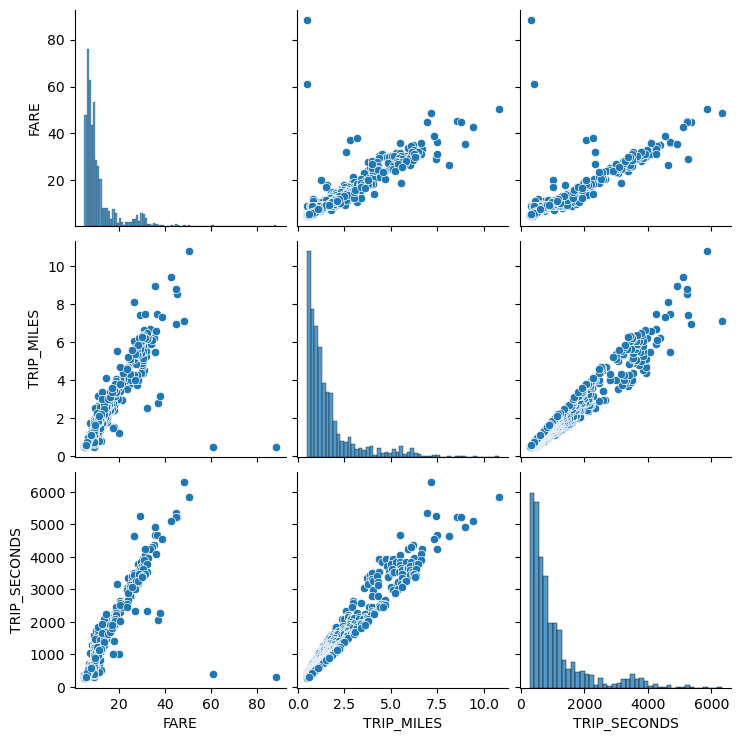

In [45]:
sns.pairplot(
    training_df,
    x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"],
    y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"]
)